Time Series Analisys for Soybean

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

from sklearn.linear_model import LinearRegression

from statsmodels.tsa.seasonal import seasonal_decompose

In [283]:
# Variables of soybeans and soy sub-products
# soyMeal = yf.Ticker('ZM=F')
# soyOil = yf.Ticker('ZL=F')
soybean = yf.Ticker('ZS=F')

# soyMeal = soyMeal.history(period="max")
# soyOil = soyOil.history(period="max")
soybean = soybean.history(period="ytd")

# Lists I use for manipulating the dataframe for each commodity
commodities = [soybean]
commodityName = ['soybean']



In [284]:
# Drop all columns except date and close price, rename close price to name of the commodity
col2drop = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits']
count = 0

for i in commodities:
    i.drop(columns = col2drop, axis = 0, inplace = True)
    i.columns = [commodityName[count]]
    count += 1

In [286]:
# Join all data frames into one
df = pd.concat(commodities, join='outer', axis=1)

# Some prices are missing for things like holidays, use forward fill to make the missing values the same as the previous
df.ffill()
df.dropna()
df.head()

,soybean
Date,
2022-01-03,1344.00
2022-01-04,1378.75
2022-01-05,1384.25
2022-01-06,1377.25
2022-01-07,1401.50


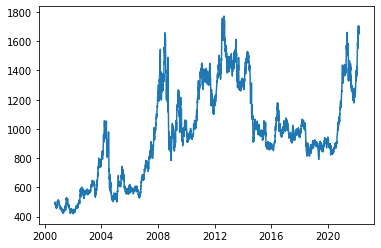

In [7]:
plt.plot(df);

In [8]:
y = df.values

In [289]:
! pip install pystan==2.19.1.1

! pip install prophet

  Using cached pystan-2.19.1.1-cp38-cp38-macosx_10_9_x86_64.whl (37.4 MB)
You should consider upgrading via the '/Users/vanessalieberg/.pyenv/versions/3.8.12/envs/project_commodity_prices/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 65 kB 278 kB/s eta 0:00:01
     |████████████████████████████████| 49 kB 1.6 MB/s eta 0:00:01
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
     |████████████████████████████████| 47 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 172 kB 4.4 MB/s eta 0:00:01
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
     |████████████████████████████████| 76 kB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 6.4 MB/s eta 0:00:01
  Using cached PyMeeus-0.5.11.tar.gz (5.4 MB)
  Using cached korean_lunar_calendar-0.2.1-py3-none-any.whl (8.0 kB)
  Using cached ephem-4.1.3-cp38-cp38-macosx_10_9_x86_64.whl (1.4 MB)
Using legacy 'setup.py install' for prophet, sin

In [292]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [293]:

train = df.iloc[0:3780]
test = df.iloc[3780:]

model = Prophet(seasonality_mode='multiplicative')

model.fit(train)

NameError: name 'Prophet' is not defined